# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [ ]:
# install necessary libraries 
!pip install turicreate
!pip install networkx
!pip install python-igraph
!pip install cairocffi

In [3]:
# import graph libraries
import turicreate as tc
import networkx as nx
import operator

In [4]:
# import relevant libraries
import re 
import numpy as np
import pandas as pd

In [5]:
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [3]:
# create datasets directory
!mkdir ./datasets

In [ ]:
# prepare GameOfThrones Reddit data
!mkdir ./datasets/GOT
!mkdir ./datasets/GOT/GOTSgraphs/
!wget http://dynamics.cs.washington.edu/nobackup/reddit/AgameofthronesLCG.tar.gz -O ./datasets/GOT/AgameofthronesLCG.tar.gz
!tar -xvf  ./datasets/GOT/AgameofthronesLCG.tar.gz -C ./datasets/GOT/GOTSgraphs/
!ls ./datasets/GOT/

In [19]:
# load sgraph of game of thrones subreddit
sg = tc.load_sgraph('./datasets/GOT/GOTSgraphs/AgameofthronesLCG.2012-06-17.2016-10-31.sgraph')
sg

SGraph({'num_edges': 8037, 'num_vertices': 1396})
Vertex Fields:['__id', 'mindate', 'maxdate']
Edge Fields:['__src_id', '__dst_id', 'maxdate', 'weight', 'mindate']

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


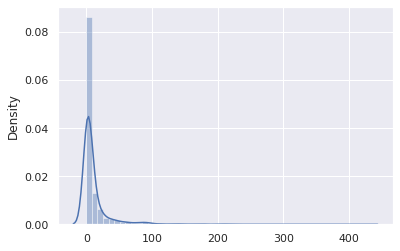

In [20]:
# calculcate the degree for each vertex
degree = tc.degree_counting.create(sg)
# Addding total degree to the vertices attributes
sg.vertices['total_degree'] = degree['graph'].vertices['total_degree']
# visualization
sns.distplot(sg.vertices['total_degree'])

**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [21]:
# convert sgraph into nxgraph
def sgraph2nxgraph(sgraph, is_directed=True, add_vertices_attributes=True, add_edges_attributes=True):
    if is_directed:
        nx_g = nx.DiGraph()
    else:
        nx_g = nx.Graph()
    if add_vertices_attributes:
        vertices = [(r['__id'] , r) for r in sgraph.vertices]
    else:
        vertices = list(sgraph.get_vertices()['__id'])

    if add_edges_attributes:
        edges = [(r['__src_id'], r['__dst_id'], r) for r in sgraph.edges]
    else:
        edges = [(e['__src_id'], e['__dst_id']) for e in sgraph.get_edges()]
    nx_g.add_nodes_from(vertices)
    nx_g.add_edges_from(edges)
    return nx_g

In [22]:
# Creating Undirected Graph
g = sgraph2nxgraph(sg)
print(nx.info(g))

DiGraph with 1396 nodes and 8037 edges


In [23]:
# According to Closeness Centrality who are the top 40 central users:
d       = nx.degree_centrality(g)
top_40  = [n for n, d in sorted(dict(d).items(), key=operator.itemgetter(1), reverse=True)[:40]]
sub     = g.subgraph(top_40)

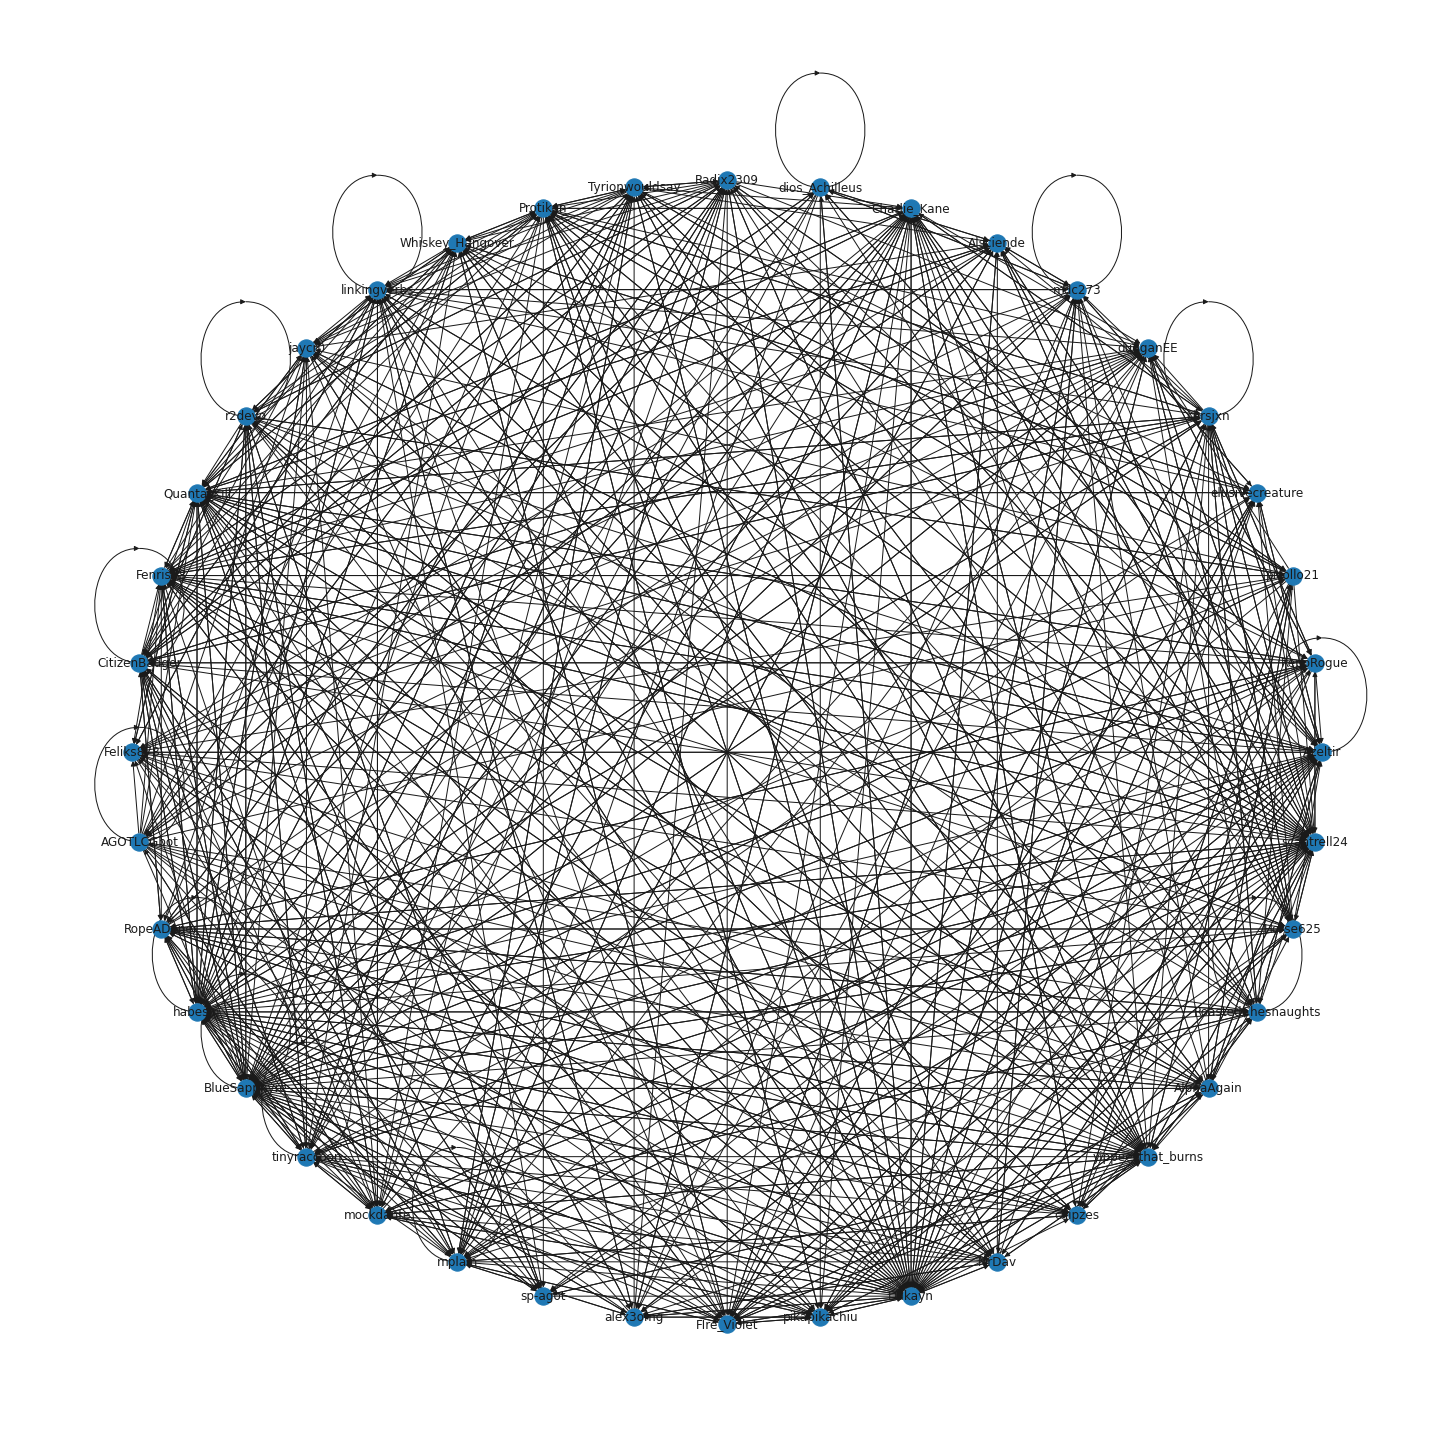

In [24]:
# Draw the subgraph using circlular layout
plt.figure(figsize=(20,20))
nx.draw_circular(sub, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [25]:
# Calculate the PageRank of each vertex in the graph
pagerank = tc.pagerank.create(sg)
pagerank['pagerank']

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 1302.26               |

| 2         | 356.64                |

| 3         | 105.391               |

| 4         | 40.7432               |

| 5         | 18.0518               |

| 6         | 11.9265               |

| 7         | 9.25851               |

| 8         | 7.53685               |

| 9         | 6.20911               |

| 10        | 5.13524               |

| 11        | 4.2662                |

| 12        | 3.54579               |

| 13        | 2.95056               |

| 14        | 2.45789               |

| 15        | 2.04941               |

| 16        | 1.70908               |

| 17        | 1.42526               |

| 18        | 1.18924               |

| 19        | 0.991934              |

| 20        | 0.827812              |

+-----------+-----------------------+

Columns:
	__id	str
	pagerank	float
	delta	float

Rows: 1396

Data:
+-----------------+---------------------+------------------------+
|       __id      |       pagerank      |         delta          |
+-----------------+---------------------+------------------------+
|      MagJoh     |         0.15        |          0.0           |
| crysnamtodshire |         0.15        |          0.0           |
|      Dovian     |  0.2859091301713731 |  8.31049555913288e-05  |
|     Shunt19     |  0.2839850219727631 | 0.00012512664228780945 |
|   MaesterBelza  |  0.2337500587872023 | 8.268899023117227e-05  |
|     ohRielli    |  0.260869592538586  | 3.6963969329839585e-08 |
|     samlsso     |         0.15        |          0.0           |
|     Haiguy91    | 0.35934887993704756 | 0.00018226747076732774 |
|     draight     | 0.27749999999999997 |          0.0           |
|     rsixidor    |  0.350120726804618  | 0.00016590189854881476 |
+-----------------+---------------------+------------------------+
[1396 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [10]:
# Calculate the triangles of each vertex in the graph
triangles = tc.triangle_counting.create(sg)
triangles['triangle_count']

Initializing vertex ids.

Removing duplicate (bidirectional) edges.

Counting triangles...

Finished in 0.173567 secs.

Total triangles in the graph : 13852

Columns:
	__id	str
	triangle_count	int

Rows: 1396

Data:
+-----------------+----------------+
|       __id      | triangle_count |
+-----------------+----------------+
|      MagJoh     |       0        |
| crysnamtodshire |       0        |
|      Dovian     |       1        |
|     Shunt19     |       3        |
|   MaesterBelza  |       0        |
|     ohRielli    |       0        |
|     samlsso     |       0        |
|     Haiguy91    |       2        |
|     draight     |       0        |
|     rsixidor    |       1        |
+-----------------+----------------+
[1396 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [ ]:
# Calculate the average shortest path of each vertex in the graph
shortest_paths = {}
for v in sg.vertices['__id']:
  shortest_paths[v] = tc.shortest_path.create(sg, v).distance['distance'].mean()

In [26]:
shortest_paths

{'MagJoh': 9.992836676217763e+29,
 'crysnamtodshire': 9.992836676217763e+29,
 'Dovian': 2.922636103151863e+29,
 'Shunt19': 2.922636103151863e+29,
 'MaesterBelza': 2.922636103151863e+29,
 'ohRielli': 9.992836676217763e+29,
 'samlsso': 9.985673352435524e+29,
 'Haiguy91': 2.922636103151863e+29,
 'draight': 9.992836676217763e+29,
 'rsixidor': 2.922636103151863e+29,
 'WesternKai_Buck': 9.992836676217763e+29,
 'ArtIsPainfulForMe': 9.992836676217763e+29,
 'Meromer0': 2.922636103151863e+29,
 'TheOxytocin': 2.922636103151863e+29,
 'MrBond90': 2.922636103151863e+29,
 'Robo_173': 2.922636103151863e+29,
 'wickershamb': 2.922636103151863e+29,
 'solprose315': 2.9083094555873915e+29,
 'gandrasch': 9.992836676217763e+29,
 'teageltron': 2.922636103151863e+29,
 'lykouragh': 9.992836676217763e+29,
 'myveryownredditaccou': 2.922636103151863e+29,
 'misomiso82': 2.922636103151863e+29,
 'Alberaan': 2.922636103151863e+29,
 'hellbalzer': 2.922636103151863e+29,
 'ror4301': 2.922636103151863e+29,
 'therealcjhard

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [28]:
nx.write_gexf(g, "./datasets/GOT/got_network_full.gexf")
nx.write_gml(g, "./datasets/GOT/got_network_full.gml")

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


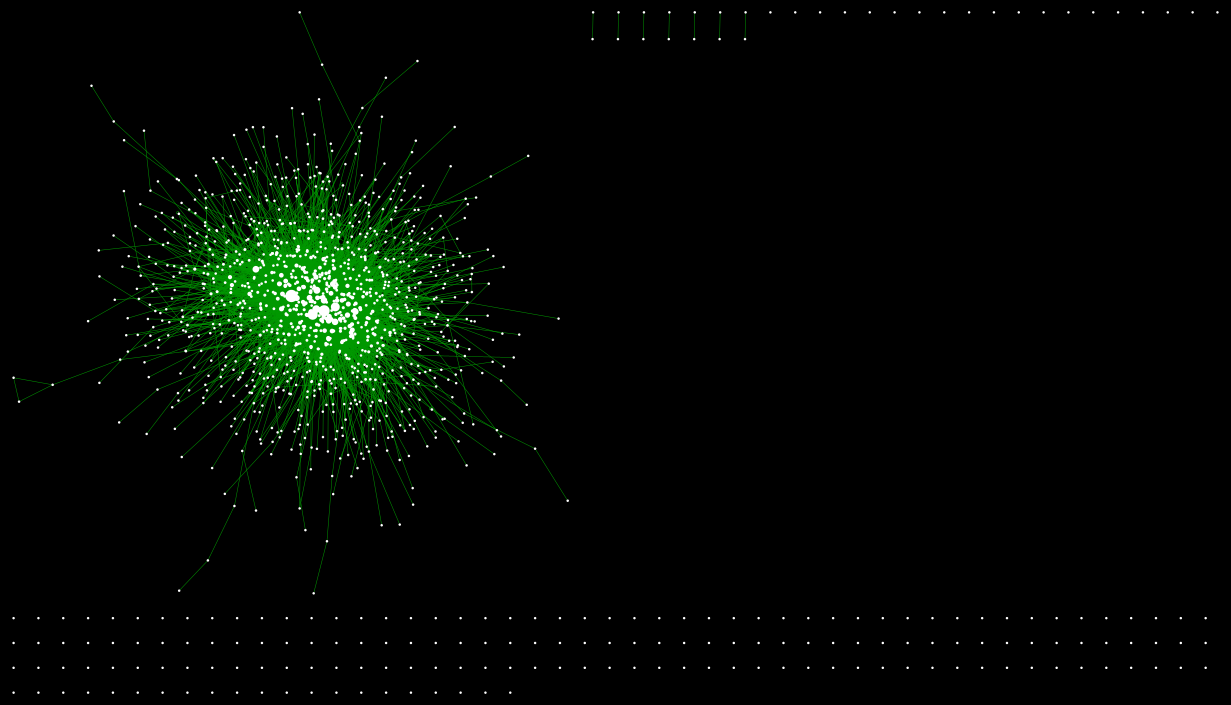

In [31]:
# Cytoscape
from IPython.display import Image
Image('/content/drive/MyDrive/BigData_Course/got_network_full_cytoscape.png')

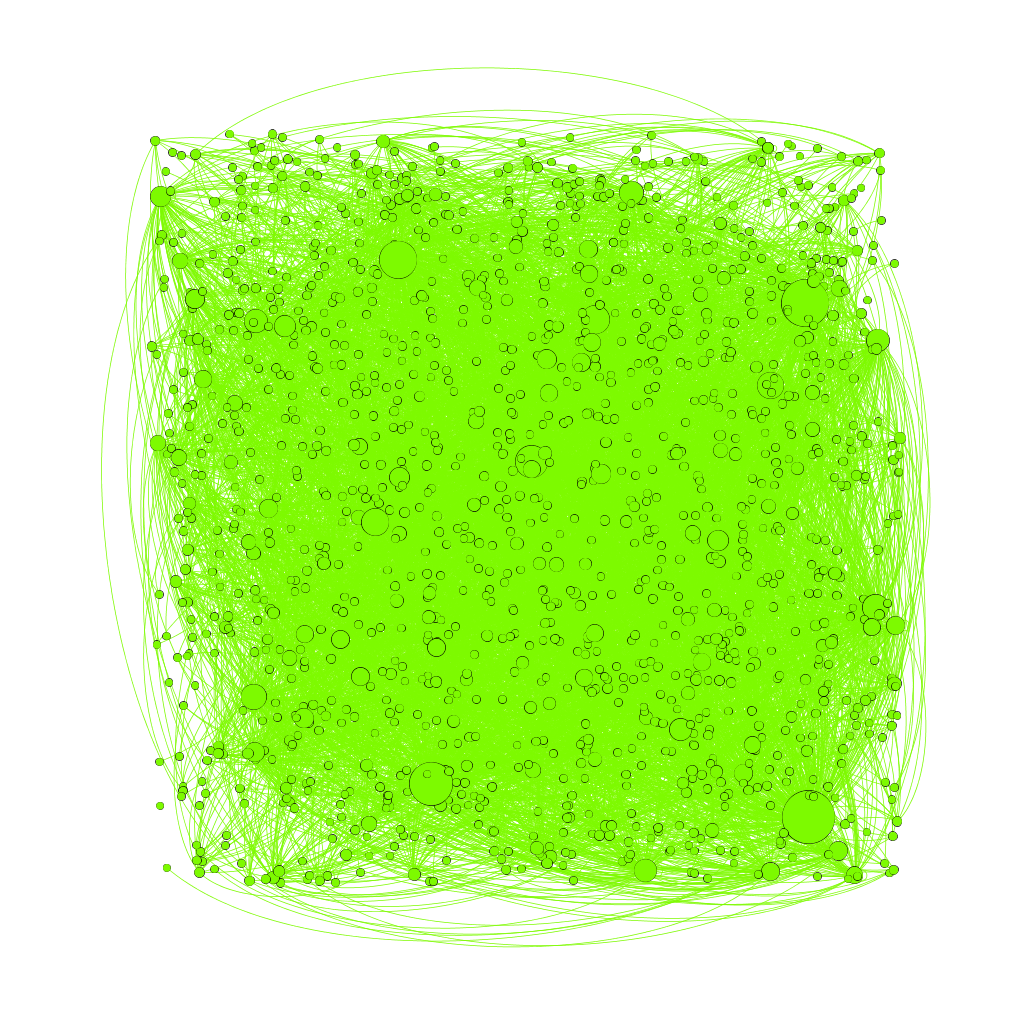

In [32]:
# Gephi
from IPython.display import Image
Image('/content/drive/MyDrive/BigData_Course/got_network_full_gephi.png')

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

In [48]:
def create_sub(vertex):
  neighbor_nodes = sg.get_neighborhood(ids=[vertex], radius=1, full_subgraph=True).vertices['__id']
  # create graph
  g = sgraph2nxgraph(sg)
  # create subgraph
  h = g.subgraph(neighbor_nodes)
  return h

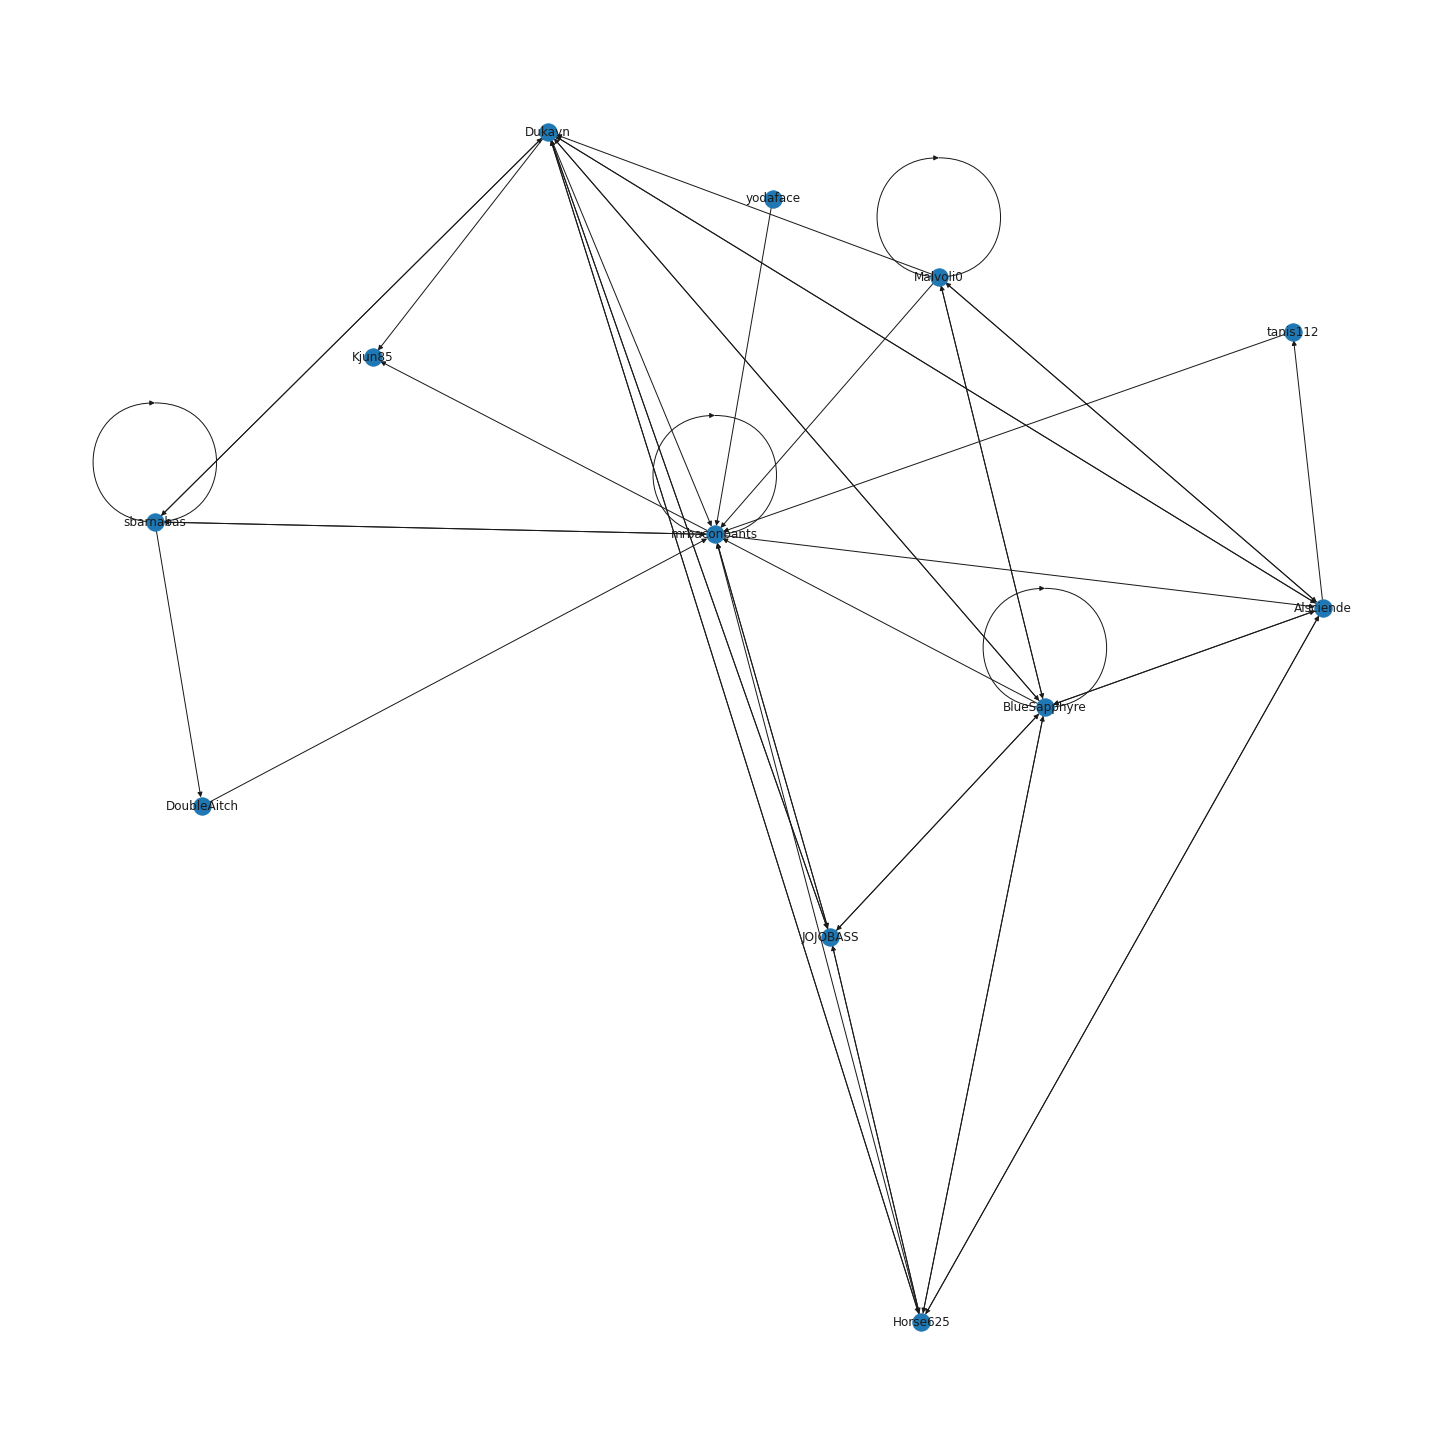

In [49]:
vertex = 'mrbaconpants'
# create the subgraph
sub_graph = create_sub(vertex)
# draw the subgraph
plt.figure(figsize=(20,20))
nx.draw_kamada_kawai(sub_graph, with_labels=True)

In [50]:
# calculate the nubmer of vertices and edges
print(nx.info(sub_graph))

DiGraph with 12 nodes and 45 edges


**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
!mkdir ./datasets/Chess
!mkdir ./datasets/Chess/Chessgraphs
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/Chess/fcis.tar.gz
!tar -xvf  ./datasets/Chess/fcis.tar.gz -C ./datasets/Chess/Chessgraphs/

In [ ]:
chess_sg_vertices = tc.SFrame.read_csv('./datasets/Chess/Chessgraphs/FCIS/fcis_chess.vertices.csv')
# read only 30M rows
chess_sg_edges    = tc.SFrame.read_csv('./datasets/Chess/Chessgraphs/FCIS/fcis_chess.interactions.csv', nrows=30000000)

In [7]:
import igraph

# create igraph from csv files
def createigraph(vertices_sframe, edges_sframe, is_directed=True):
    g = igraph.Graph(directed=is_directed)
    vertices = list(vertices_sframe['v_id'])
    g.add_vertices(len(vertices))
    g.vs["name"] = vertices
    v_dict = {vertices[i]: i for i in range(len(vertices))}
    edges = [(v_dict[e['src_id']], v_dict[e['dst_id']]) for e in  edges_sframe]
    g.add_edges([e[0], e[1]] for e in edges)
    
    return g
  
ig = createigraph(chess_sg_vertices, chess_sg_edges)
print("iGraph: Vertices %s and Links %s" % (ig.vcount(), ig.ecount()))

iGraph: Vertices 519583 and Links 30000000


In [7]:
# calculate page rank
pagerank = ig.pagerank(niter=1000)

# connect pagerank with vertex
nodes_pagerank = {v.attributes()['name']: pagerank[i] for i,v in enumerate(ig.vs)}

# find the top most central players
top_vertices = [v for v,p in sorted(dict(nodes_pagerank).items(), key=operator.itemgetter(1), reverse=True)[:10]]

print("The top-10 most centeral players are:")
for i,v in enumerate(top_vertices):
  print(f"{i+1}. {v} : {nodes_pagerank[v]}")

The top-10 most centeral players are:
1. mscp : 0.002598786274625717
2. Wronskian : 0.0025453577967004537
3. stupido : 0.0014170598835655894
4. flak : 0.0013325697319791154
5. GriffyJr : 0.0012287950967596942
6. fake : 0.0011281302419363427
7. secone : 0.0011158293374238686
8. FriarTuck : 0.0010739335945273707
9. GriffySr : 0.0009061326298161082
10. JagorCrafty : 0.0008861958973252117


In [8]:
# to visualize part of the network I will choose a subgraph of 100 vertices 
selected_vertices = list(range(100))
sub_graph_chess = ig.subgraph(selected_vertices)

# make kamada kawi layout
layout_chess = sub_graph_chess.layout_kamada_kawai()

# add labels
sub_graph_chess.vs["label"] = [v.attributes()['name'] for v in sub_graph_chess.vs]

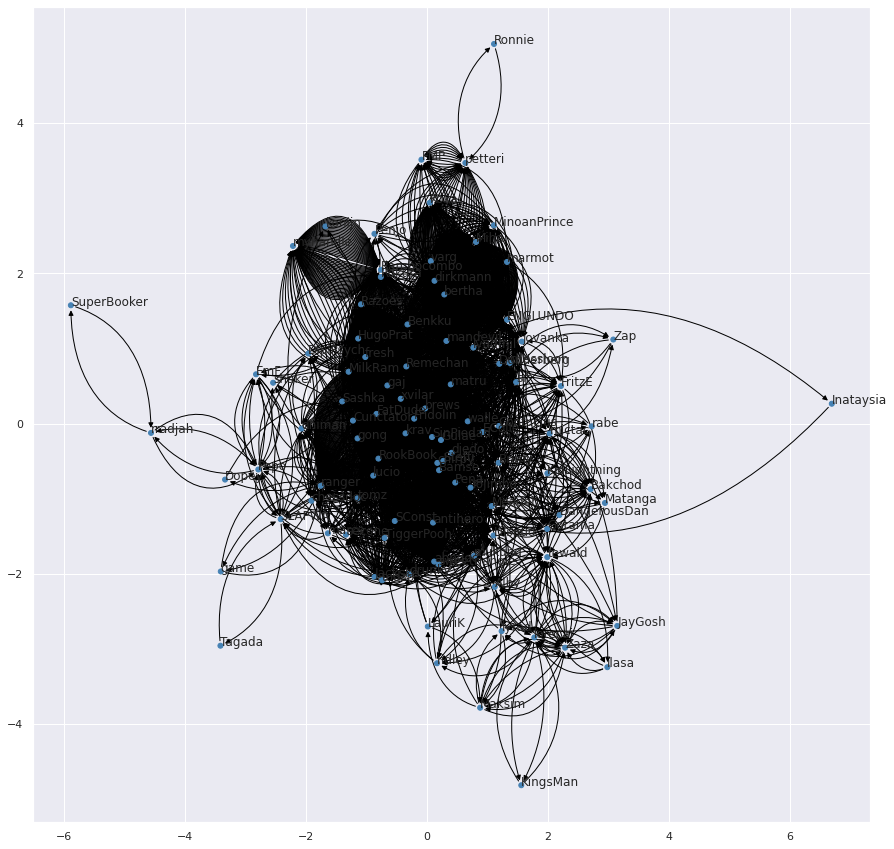

In [13]:
# visualize subgraph
fig, ax = plt.subplots(figsize=(15,15))
igraph.plot(sub_graph_chess, target=ax, layout=layout_chess, vertex_label=sub_graph_chess.vs["label"])

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [ ]:
import json

!mkdir /root/.kaggle/

# Installing the Kaggle package
!pip install kaggle 

api_token = {"username":"amitdamri","key":"a076ad6676498fde930f6aacbda924c4"}

# creating kaggle.json file with the personal API-Key details 
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

In [6]:
# load data
df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

birth  ...                                 spouse
0                                        ...                                Belemir
1                               TA 2978  ...                                       
2                                        ...                                       
3                                TA 280  ...                           Unnamed wife
4                                        ...                                       
..                                  ...  ...                                    ...
906                      Mid ,First Age  ...                                 Brodda
907                                      ...                                       
908  YT during the ,Noontide of Valinor  ...  Loved ,Andreth but remained unmarried
909                             TA 2917  ...                           Unnamed wife
910                     Before ,TA 1944  ...                                       

[911 rows x 9 columns]

In [7]:
# group by race and gender
g = df.groupby(['race', 'gender'])
# g.size()# create a Series 
g.size().to_frame (name='counts').sort_values('counts', ascending=0)

counts
race       gender        
Men        Male       334
                      137
Hobbits    Male        89
Elves      Male        76
Men        Female      51
...                   ...
Dragon     Male         1
Black Uruk Male         1
Hobbits    male         1
Eagle      Male         1
Wolfhound  Male         1

[61 rows x 1 columns]

In [8]:
# normalize spouse name to find couples
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df

name   norm_spouse   race  gender
0               Adanel       Belemir    Men  Female
7               Angrod      Eldalótë  Elves    Male
10         Ar-Pharazôn    Tar-Míriel    Men    Male
12         Ar-Gimilzôr     Inzilbêth    Men    Male
21   Tarannon Falastur     Berúthiel    Men    Male
..                 ...           ...    ...     ...
897            Ailinel     Orchaldor    Men  Female
898           Almarian  Tar-Meneldur    Men  Female
899             Algund    None known    Men    Male
906              Aerin        Brodda    Men  Female
908             Aegnor       Andreth  Elves    Male

[228 rows x 4 columns]

In [9]:
# find couples by join according to norm_spouse column and name
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

name_x race_x gender_x        name_y race_y gender_y
0               Adanel    Men   Female       Belemir    Men     Male
1               Angrod  Elves     Male      Eldalótë  Elves   Female
2          Ar-Pharazôn    Men     Male    Tar-Míriel    Men   Female
3          Ar-Gimilzôr    Men     Male     Inzilbêth    Men   Female
4    Tarannon Falastur    Men     Male     Berúthiel    Men   Female
..                 ...    ...      ...           ...    ...      ...
122             Amroth  Elves     Male      Nimrodel  Elves   Female
123             Amarië  Elves   Female        Finrod  Elves     Male
124            Ailinel    Men   Female     Orchaldor    Men     Male
125           Almarian    Men   Female  Tar-Meneldur    Men     Male
126             Aegnor  Elves     Male       Andreth    Men   Female

[127 rows x 6 columns]

In [11]:
# create couples graph
ltor_g = nx.Graph()

for i, r in links_df2.iterrows():
    ltor_g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    ltor_g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

ltor_g.add_edges_from(edges_list)

In [12]:
# save the graph to use it in cytoscape
nx.write_gml(g, "./datasets/ltor/ltor_full_network.gml")

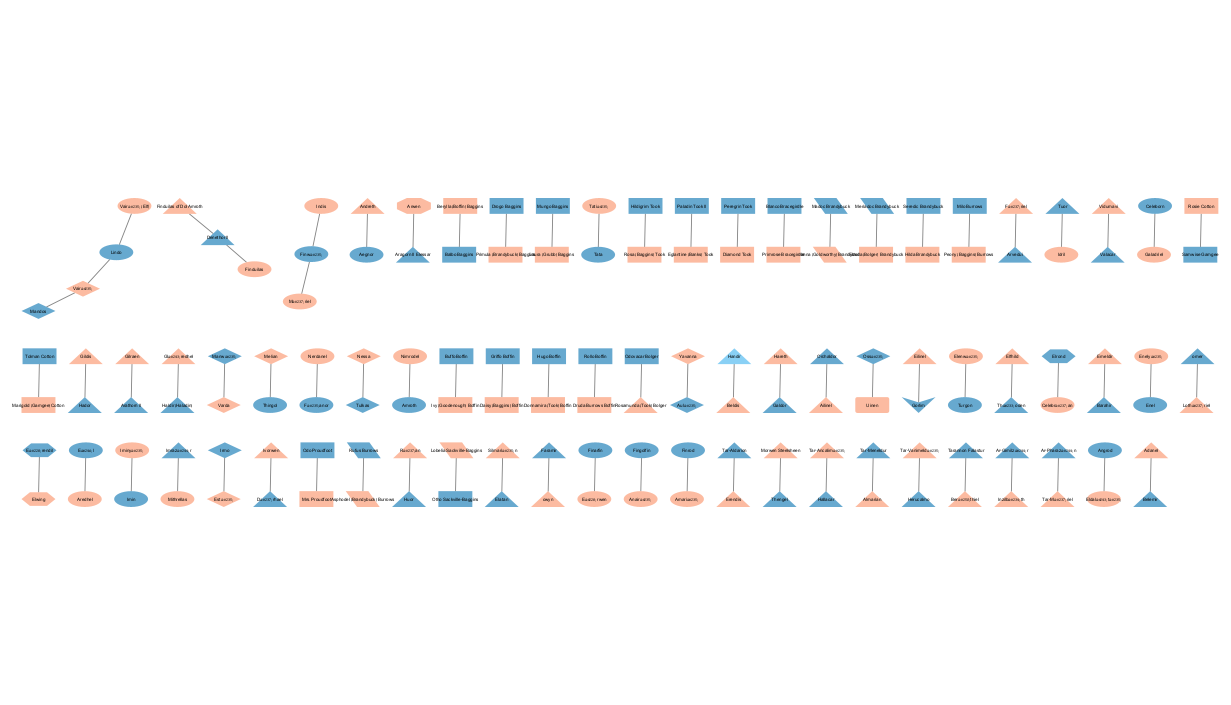

In [15]:
# Cytoscape
from IPython.display import Image
Image('/content/drive/MyDrive/BigData_Course/ltor_full_network.png')

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges